In [64]:
import numpy as np
import pandas as pd
from scipy.stats import (kstest,ks_2samp,probplot,ttest_ind,levene)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [9]:
data3=pd.read_csv('SejongData/3.세종시_아파트(매매)_실거래가.csv',thousands=',')

In [ ]:
data3['지역']=data3['시군구'].str.split(' ',expand=True)[1]

#### [참고](https://alex-blog.tistory.com/entry/t-test-ANOVA-%EC%89%BD%EA%B2%8C%EC%89%BD%EA%B2%8C-%EA%B8%B0%EC%96%B5%ED%95%98%EC%9E%90)

1. 표본 콜모고로프-스미르노프 검정 

H0 : 매매가 정규분포에서 위 표본이 추출될수 있다.  
H1 : 안된다.

KstestResult(statistic=0.999997919881211, pvalue=0.0)

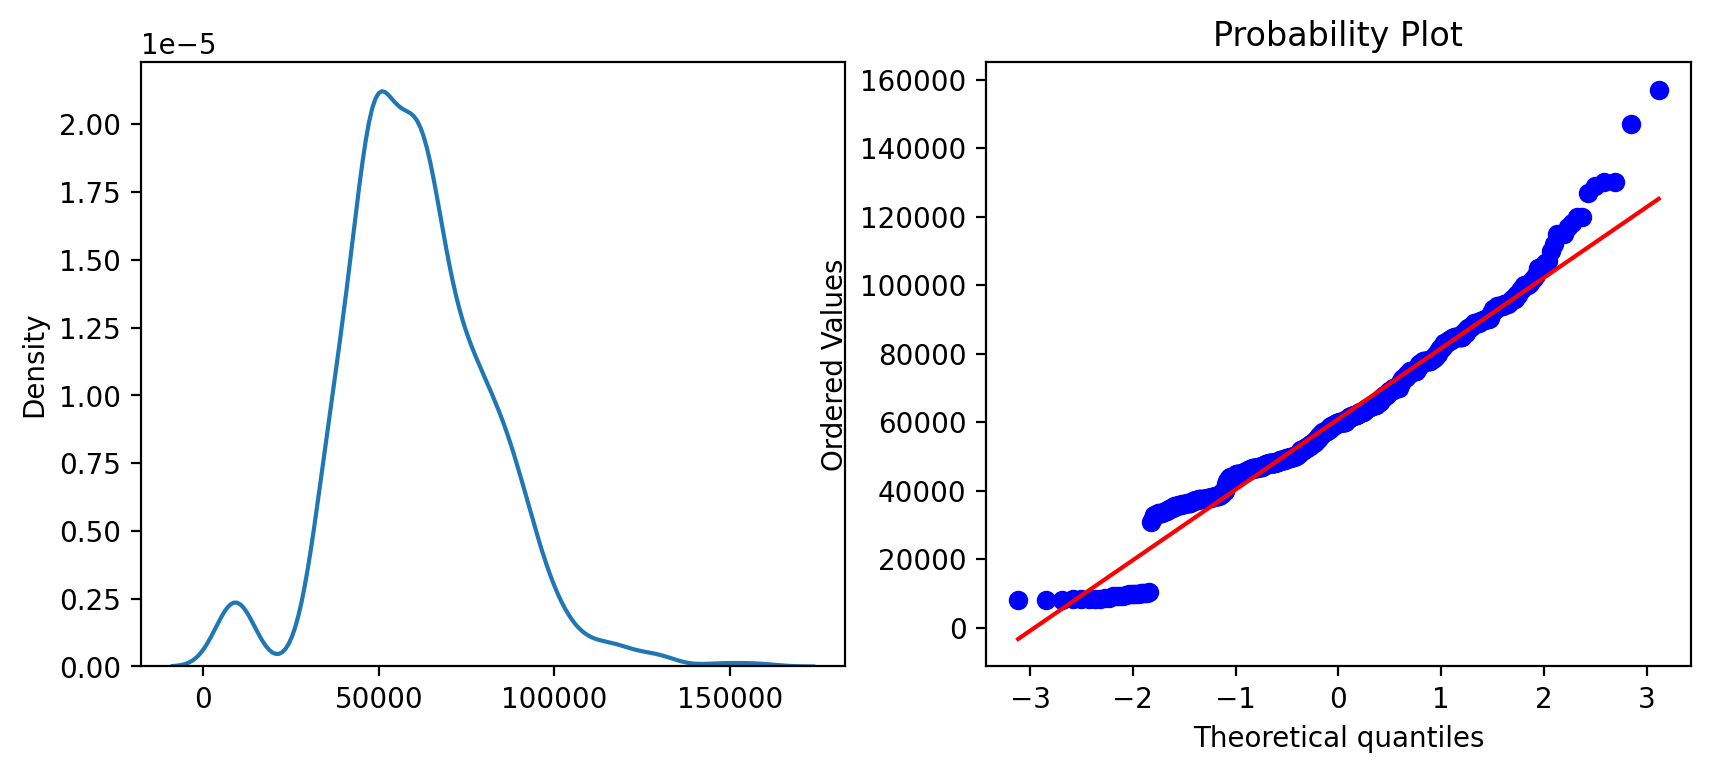

In [53]:
scaler=StandardScaler()

temp=data3[data3['시군구']=='세종특별자치시 보람동']['거래금액(만원)'].values

fig,ax=plt.subplots(1,2,figsize=(10,4),dpi=200)

sns.kdeplot(temp,ax=ax[0]);
res=probplot(temp,plot=ax[1])
temp=scaler.fit_transform(temp.reshape(-1,1))
kstest(temp,'norm')

In [60]:
g1=data3[data3['시군구']=='세종특별자치시 보람동']['거래금액(만원)']
g2=data3[data3['시군구']=='세종특별자치시 보람동']['거래금액(만원)'].sample(frac=0.3)

In [61]:
# g1은 그대로
# g2은 보람동 거래금액에서 sample 30% 가져온것.

# p-value 귀무가설이 맞을때 이상값이 나올 확률이 귀무가설이 틀릴확률 0.05 보다 높다. 즉, 귀무가설을 기각할수없고. 둘은 같은 분포를 이룬다.
ks_2samp(g1,g2)

Ks_2sampResult(statistic=0.03307741897673328, pvalue=0.9871864992448827)

[세종시 주택 평균 전세값](https://www.sjsori.com/news/articleView.html?idxno=48888#:~:text=%EC%84%B8%EC%A2%85%EC%8B%9C%EC%9D%98%20%EC%95%84%ED%8C%8C%ED%8A%B8%20%ED%8F%89%EA%B7%A0,%EC%9C%BC%EB%A1%9C%20%EC%97%AD%EC%8B%9C%20%EC%A0%84%EA%B5%AD%202%EC%9C%84%EB%8B%A4.) : 2억9,213만원  

세종시 주택 평균 매매가 : 5억205만원

2. ttest 독립표본검정 와 levene 등분산검정

H0 : 두 독립 표본간에 거래금액 평균은 차이없다.  
H1 : 두 독립 표본간에 거래금액 평균은 차이있다. 

등분산 검정  

H0 : 두 독립 표본간의 분산은 같다.  
H1 : 두 독립 표본간의 분산은 다르다.  

In [65]:
보람=data3[data3['시군구']=='세종특별자치시 보람동']['거래금액(만원)']
종촌=data3[data3['시군구']=='세종특별자치시 종촌동']['거래금액(만원)']

In [67]:
# 등분산이다. 
levene(보람,종촌)

LeveneResult(statistic=355.7448789636742, pvalue=8.749593291078211e-76)

In [68]:
# 차이없다.
ttest_ind(보람,종촌,equal_var=True)

Ttest_indResult(statistic=36.417079858603095, pvalue=7.0406756661036504e-248)

In [79]:
조치원읍=data3[data3['지역']=='조치원읍']['거래금액(만원)']

In [80]:
levene(보람,조치원읍)

LeveneResult(statistic=991.4757659407237, pvalue=2.0696670007519206e-197)

In [81]:
# 분산은 같다. 다만, 평균은 다르다.
ttest_ind(보람,조치원읍,equal_var=True)

Ttest_indResult(statistic=95.35712525016403, pvalue=0.0)